In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(df.iloc[:,12:], axis = 1)

In [5]:
df = df.drop('status_id', axis = 1)

In [6]:
type(df["status_published"][0])

str

In [7]:
print('Valores duplicados:', df.duplicated().value_counts())

Valores duplicados: False    6996
True       54
dtype: int64


In [8]:
df = df.drop_duplicates()

In [9]:
df = df.reset_index()


In [10]:
df.drop("index", axis = 1, inplace=True)

In [11]:
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6991,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
6992,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
6993,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
6994,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [12]:
print('Valores faltantes:', df.isnull().sum())

Valores faltantes: status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


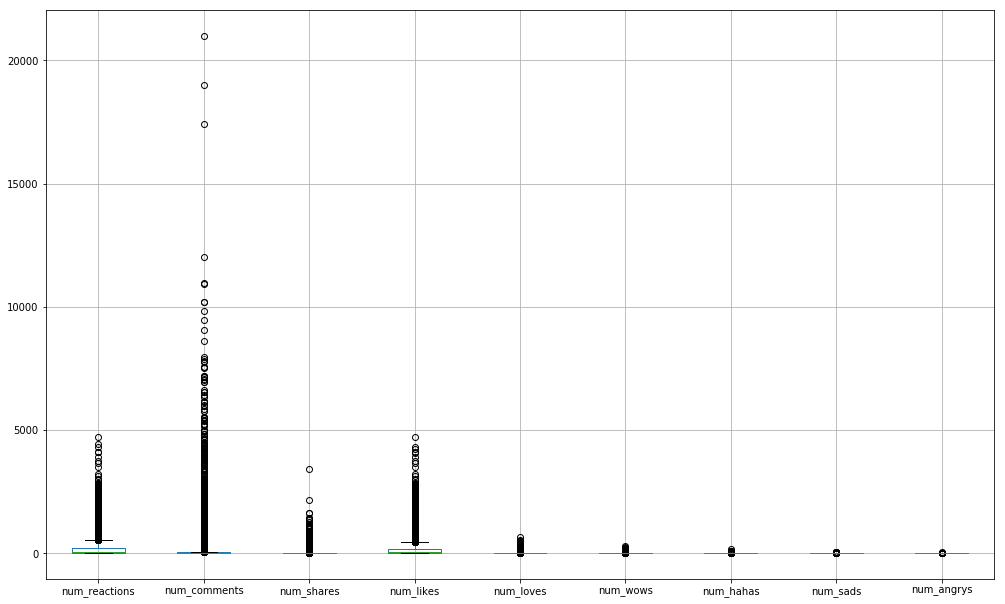

In [13]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
df.boxplot()

In [14]:
df['num_comments'].nlargest(10)

498     20990
480     19013
6703    17404
3246    12003
6708    10960
6745    10926
6605    10194
6394    10186
6721     9831
3890     9452
Name: num_comments, dtype: int64

In [15]:
df.drop([498, 480, 6703, 3246], axis = 0 ,inplace = True)

In [16]:
df = df.reset_index()
df.drop("index", axis = 1, inplace=True)

In [17]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [28]:
from sklearn.preprocessing import LabelEncoder

status_type = LabelEncoder().fit_transform(df['status_type'])
df['status_type'] = status_type

In [33]:
df.drop("status_published", axis = 1, inplace = True)

In [135]:
x = df

# Hierárquico single linked

### n_cluster = 5

In [252]:
from sklearn.cluster import AgglomerativeClustering

In [253]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [254]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6988
1,1
2,1
3,1
4,1


### n_cluster = 3

In [232]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [233]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6990
1,1
2,1


### n_cluster = 10

In [255]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [256]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6979
1,3
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,1


### n_cluster = 15

In [258]:
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [259]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6975
1,2
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,1


# Hierárquico complete linked

### n_cluster = 5

In [260]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [261]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6635
1,180
2,126
3,43
4,8


### n_cluster = 3

In [240]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [241]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6815
1,126
2,51


### n_cluster = 4

In [242]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [243]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6815
1,126
2,43
3,8


### n_cluster = 5

In [245]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [246]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6635
1,180
2,126
3,43
4,8


In [251]:
hc = AgglomerativeClustering(n_clusters = 20, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,5742
1,564
2,255
3,117
4,74
5,63
6,41
7,36
8,18
9,15


In [263]:
len(y_hc)

6992

Text(0,0.5,'Euclidian Distances')

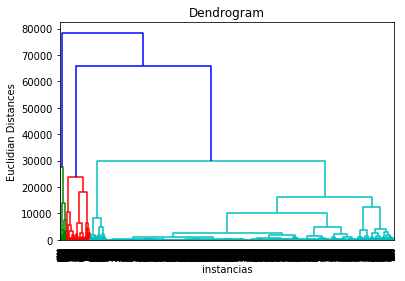

In [267]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("instancias")
plt.ylabel('Euclidian Distances')

Text(0,0.5,'Euclidian Distances')

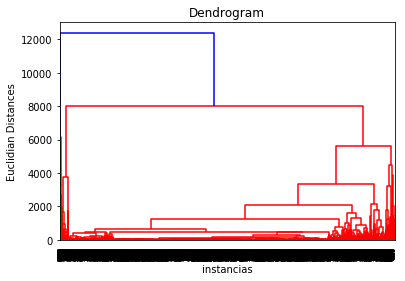

In [268]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'complete'))
plt.title("Dendrogram")
plt.xlabel("instancias")
plt.ylabel('Euclidian Distances')